## Exercise 2.2

#### 1) Use K means clustering to cluster the MNIST dataset. Remember that in unsupervised learning, you do not know what each digit means (they do not have labels). You just cluster them to groups. Also, you don’t know the number of clusters, so you need to choose K. Suggest and use a method to choose K. Analyze the performance. Use t-SNE to visualize the results in 2D. Discuss what it shows.

In [3]:
# First we Import and set up the data

import numpy as np
import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [5]:
X, y = mnist["data"].to_numpy(), mnist["target"].to_numpy()
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [90]:
ntrain = 10000
ntest = 69000
x_train = X[:ntrain]
y_train = y[:ntrain]
x_test = X[ntest:]
y_test = y[ntest:]

In [91]:
x_train.shape

(10000, 784)

In [92]:
y_train.shape

(10000,)

In [54]:
x_test.shape

(1000, 784)

In [55]:
y_test.shape

(1000,)

In [56]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([ 97, 116,  99,  93, 105,  92,  94, 117,  87, 100], dtype=int64))
(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([102, 119,  99, 102,  92,  85, 102, 115,  94,  90], dtype=int64))


#### Perform K-means on the dataset

In [57]:
from sklearn.cluster import KMeans
import timeit

start = timeit.default_timer()
kmeans = KMeans(n_clusters=9, random_state=0).fit(x_train)
end = timeit.default_timer()
kmeans.labels_
print("time=%.4f" % (end-start))

time=0.4735


In [58]:
from sklearn.cluster import MiniBatchKMeans
start = timeit.default_timer()
kmeans = MiniBatchKMeans(n_clusters=9)
kmeans.fit(x_train)
end = timeit.default_timer()
kmeans.labels_
print("time=%.4f" % (end-start))

time=0.1160


C:\Users\ostavre\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


#### Use Elbow method to identify number of Clusters 

In [77]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

range_k = range(2, 100)

sse = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_train)
    sse.append(kmeans.inertia_)

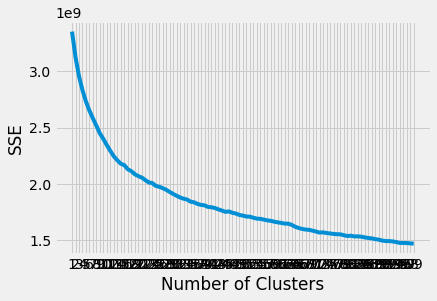

In [78]:
plt.style.use("fivethirtyeight")
plt.plot(range_k), sse)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [79]:
from kneed import KneeLocator
kl = KneeLocator(
     range_k, sse, curve="convex", direction="decreasing"
 )

kl.elbow


25

#### Use Silhouette Coefficient to identify number of Clusters 

In [83]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_train)
    score = silhouette_score(x_train, kmeans.labels_)
    silhouette_coefficients.append(score)

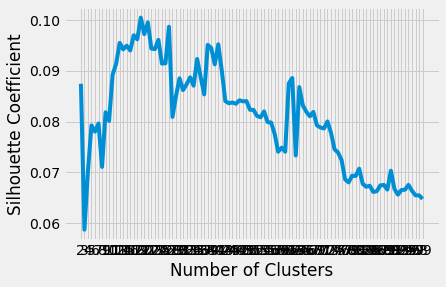

In [84]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, silhouette_coefficients)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [82]:
silhouette_coefficients

[0.0874428169146833,
 0.05872742789382217,
 0.07032862827665776,
 0.07925065930550611,
 0.07803171418677715,
 0.07963341302938437,
 0.07107216758317693,
 0.08183600515541448,
 0.08012491600704744,
 0.08923495221273259,
 0.09137775509532231,
 0.09548268691748822,
 0.0942215210194761,
 0.09493200749863305,
 0.09398981412323265,
 0.0969899410880958,
 0.09618454353711453,
 0.10046029989310941,
 0.09721252633062388,
 0.09951096533838728,
 0.0943795103789925,
 0.09426073815524078,
 0.09608765393125238,
 0.0914164991386659,
 0.09148177897179045,
 0.09866970508992998,
 0.08091830827769281,
 0.08504537658372686,
 0.08852056126055406,
 0.08618757862023813,
 0.0873266615003494,
 0.08871449096171634,
 0.08705725722111579,
 0.09232627156547495,
 0.08876519809438664,
 0.08534597429863004,
 0.0950980247854558,
 0.09448583197736946,
 0.09125091048484617,
 0.09521262710264392,
 0.09001888694528876,
 0.08402896801831698,
 0.08361306156283037,
 0.08375693625714456,
 0.08351159817506408,
 0.08418697690579

In [86]:
from sklearn.metrics import homogeneity_score

def calc_metrics(estimator, data, labels):
    #print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = estimator.inertia_
    #print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = homogeneity_score(labels, estimator.labels_)
    #print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

In [87]:
from sklearn.metrics import accuracy_score

iner_list=[]
homo_list=[]

for k in range_k:
    estimator = KMeans(n_clusters=k, **kmeans_kwargs)
    estimator.fit(x_train)
    
    inertia, homo = calc_metrics(estimator, x_train, y_train)
    iner_list.append(inertia)
    homo_list.append(homo)
    

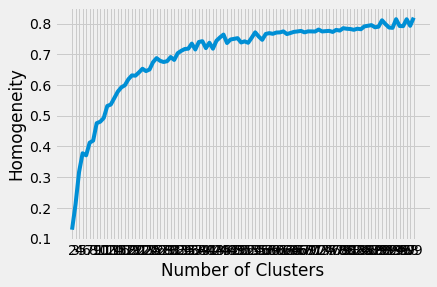

In [88]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, homo_list)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("Homogeneity")
plt.show()

In [89]:
 homo_list

[0.12895840539625375,
 0.2123387115430414,
 0.3172198762660659,
 0.3778872516014017,
 0.3711074589287246,
 0.41219589089679426,
 0.41916609303332114,
 0.47578729740629133,
 0.4806610085085525,
 0.49270199198582765,
 0.5317701035821979,
 0.5365915238127055,
 0.5575408655869492,
 0.5786616581278414,
 0.5925070905536046,
 0.5993704459365115,
 0.6188708151731742,
 0.6314204695029842,
 0.6306079351173421,
 0.6412775431596942,
 0.6530477079486354,
 0.6454581791880585,
 0.6506898295440323,
 0.674573601269468,
 0.6876564090130636,
 0.6788987556326509,
 0.6750785701989572,
 0.6778064227864743,
 0.6912574567693676,
 0.6818146540199291,
 0.7037839680607205,
 0.7114257921860864,
 0.7173519391892992,
 0.7184135481460979,
 0.735042225676659,
 0.715804324622699,
 0.7402610061689163,
 0.7429024659374576,
 0.7203722824937586,
 0.7378469620125953,
 0.7184804899206256,
 0.7442074414596659,
 0.7551613416810157,
 0.7644548440874137,
 0.7368591008795031,
 0.7483836090010265,
 0.750518902596819,
 0.752723376

#### Plot using t-SNE

In [93]:
from sklearn.manifold import TSNE

start = timeit.default_timer()
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(x_train)
tsne_data = np.vstack((tsne_data.T, y_train)).T
end = timeit.default_timer()

tsne_data
print("time=%.4f" % (end-start))

time=62.7663


C:\Users\ostavre\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


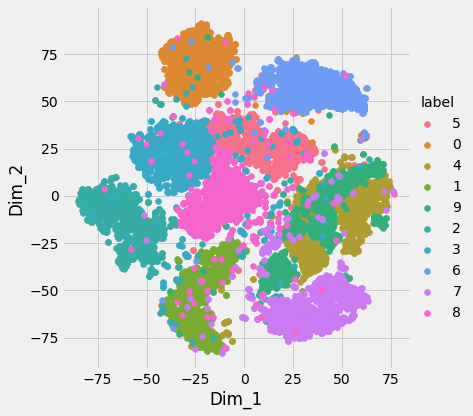

In [94]:
import pandas as pd
import seaborn as sns

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

#### 2) Use PCA to reduce the dimensionality of the dataset to 150 and test K-means clustering. Compare the results to the results of K means clustering on the original data. How do the computation times compare?

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#x_train = StandardScaler().fit_transform(x_train)
pca = PCA(n_components=150)
start = timeit.default_timer()
pca_res = pca.fit_transform(x_train)
end = timeit.default_timer()
print("time=%.4f" % (end-start))

time=0.8170


In [113]:
print (pca.explained_variance_)
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[349917.23332819 247529.40942831 209632.63856522 185786.13018084
 163847.49495103 151410.48093143 112616.3592749  100419.26091439
  95530.38435427  79154.79753948  73054.39950678  70476.18411889
  57872.92183896  57695.42861449  55462.77340082  52781.31067524
  44182.22423119  43352.9341953   39761.7203637   38687.6498728
  35468.78980091  34573.79020096  32401.07828478  31679.61731826
  29327.90679214  28921.54979176  27569.89604209  26609.66192424
  24712.5264268   23512.62017339  22405.4554315   21592.62281206
  20410.46680223  20162.36706378  18938.0477754   18159.34037936
  17612.49141126  16457.24158483  16324.14037484  16041.77952451
  15418.25434599  14368.31388751  14116.19339459  13764.46400174
  12827.44933157  12459.67271414  12026.74274564  11875.57422887
  11291.63011148  11193.07238828  10984.41367514  10838.5032574
  10137.61387289   9804.01325746   9614.46843734   9275.25238596
   9061.82824287   8650.62403658   8531.2777493    8369.33989785
   8155.98916721   7987.538

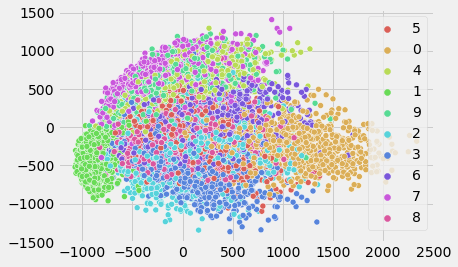

In [104]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = y_train, palette = sns.hls_palette(10), legend = 'full');

In [105]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse_pca = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_res)
    sse_pca.append(kmeans.inertia_)

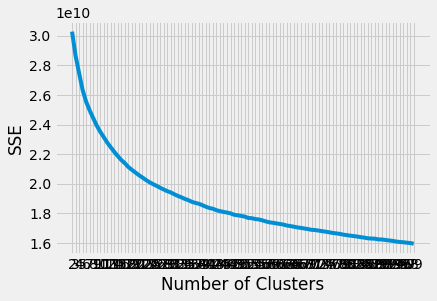

In [106]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, sse_pca)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [107]:
from kneed import KneeLocator
kl = KneeLocator(
     range_k, sse_pca, curve="convex", direction="decreasing"
 )

kl.elbow

24

In [108]:
start = timeit.default_timer()
kmeans = KMeans(n_clusters=24, random_state=0).fit(pca_res)
end = timeit.default_timer()
kmeans.labels_
print("time=%.4f" % (end-start))

time=3.2009


In [114]:
from sklearn.metrics import accuracy_score

iner_list=[]
homo_list=[]

for k in range_k:
    estimator = KMeans(n_clusters=k, **kmeans_kwargs)
    estimator.fit(pca_res)
    
    inertia, homo = calc_metrics(estimator, pca_res, y_train)
    iner_list.append(inertia)
    homo_list.append(homo)
    

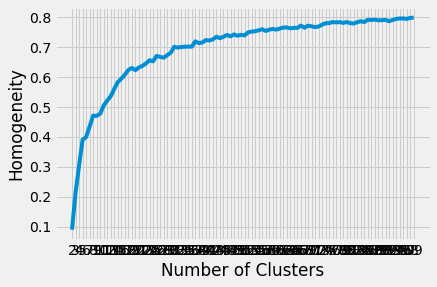

In [115]:
plt.style.use("fivethirtyeight")
plt.plot(range_k, homo_list)
plt.xticks(range_k)
plt.xlabel("Number of Clusters")
plt.ylabel("Homogeneity")
plt.show()

In [116]:
 homo_list

[0.08950299184640036,
 0.2132423321350572,
 0.3035053750828547,
 0.3898164762274128,
 0.3990780116664813,
 0.4344225384515203,
 0.4707024991538984,
 0.4696751002885044,
 0.4772341024717758,
 0.5044755250026345,
 0.520884662315114,
 0.5358288444786445,
 0.5602154144166662,
 0.5828592784932363,
 0.5942919239368762,
 0.6073131022877947,
 0.6230627443783991,
 0.629845182987204,
 0.6224796852582778,
 0.6318331774870559,
 0.6367594057142085,
 0.645123036780168,
 0.6554953527320949,
 0.6519029070871086,
 0.6701012050462588,
 0.6668220698558605,
 0.6643176482157608,
 0.6723977697131865,
 0.6805396676411255,
 0.7006062188332169,
 0.6978203105322386,
 0.6998299385115929,
 0.7007932466688964,
 0.7012748362143345,
 0.7011038425253896,
 0.718571698581548,
 0.71282524771414,
 0.7149599689530528,
 0.7230824127495483,
 0.721631389179611,
 0.7255129889140554,
 0.7343738805690246,
 0.7293361248559938,
 0.734226639093746,
 0.7401648393875595,
 0.7353662946601215,
 0.74185301775212,
 0.7375579211601943,
 